In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv("./data/Advertising.csv", index_col = 0)
data.shape

(200, 4)

In [9]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [11]:
x = data.iloc[:,:3]
y = data.iloc[:,3]
x.shape , y.shape

((200, 3), (200,))

In [12]:
import seaborn as sns

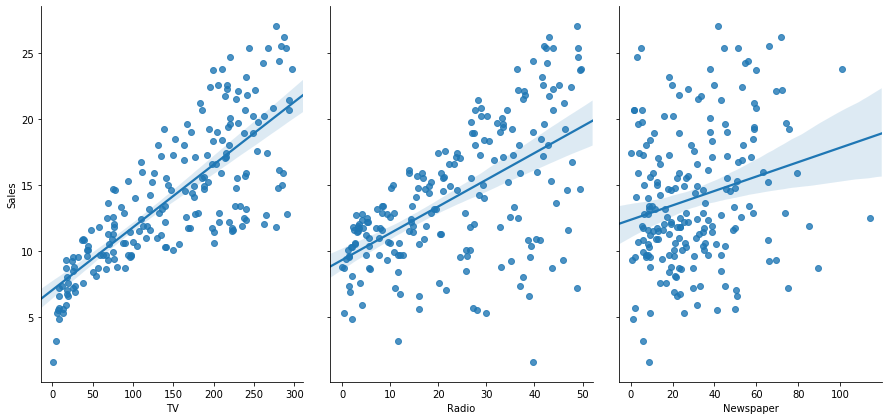

In [13]:
sns.pairplot(data, x_vars = data.columns[:-1], y_vars = "Sales", height = 6, aspect = 0.7, kind = "reg")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)
pre = model.predict(x_test)
print("Train score : {}".format(model.score(x_train,y_train)))
print("Test score : {}".format(model.score(x_test,y_test)))

Train score : 0.9072183330817297
Test score : 0.8576396745320892


In [18]:
print("가중치 : ", model.coef_)
print("절편 : ", model.intercept_)

가중치 :  [0.04416235 0.19900368 0.00116268]
절편 :  2.8925700511511483


### 0.044x1 + 0.199x2 + 0.0011x3 + 2.892
#### 0.044TV + 0.199Radio + 0.011Newspaper + 2.892

## Newspaper 빼고 진행

In [19]:
x2 = data.loc[:,:"Radio"]
y2 = data.iloc[:,3]
x2.shape , y2.shape

((200, 2), (200,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x2,y2, random_state = 0)

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((150, 2), (150,), (50, 2), (50,))

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)
pre2 = model.predict(x_test)
print("Train score : {}".format(model.score(x_train,y_train)))
print("Test score : {}".format(model.score(x_test,y_test)))

Train score : 0.9071991785449653
Test score : 0.8580883042722336


In [23]:
print("가중치 : ", model.coef_)
print("절편 : ", model.intercept_)

가중치 :  [0.04419729 0.19946953]
절편 :  2.9109237322037895


## RMSE

In [24]:
from sklearn.metrics import mean_squared_error

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
print(np.sqrt(mean_squared_error(pre, y_test)))
print(np.sqrt(mean_squared_error(pre2, y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [50, 40]

In [40]:
data = pd.read_csv("./data/Advertising.csv", index_col = 0)
x = data.iloc[:,:2]
y = data["Sales"]

In [41]:
col = x.columns
print(col)
for i in range(col.size):
    for j in range(i, col.size):
        x[col[i]+"*"+col[j]] = x[col[i]]*x[col[j]]

Index(['TV', 'Radio'], dtype='object')


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=22,test_size=0.2)
model = LinearRegression().fit(x_train,y_train)

print("- 모델명 : ",str(model).split("(")[0])
print("-"*30)
print("- 훈련 점수 : ",model.score(x_train,y_train))
print("- 테스트 점수 : ",model.score(x_test,y_test))
print("-"*30)
for i in range(len(model.coef_)):
    print("-",X.columns[i],"의 가중치 : ",model.coef_[i])
print("- 절편 : ",model.intercept_)
y_pred = model.predict(x_test)
print("-"*30)
print("- Sales의 평균 : ",y.mean())
print("- Sales_train의 평균 : ",y_train.mean())
print("- Sales_test의 평균 : ",y_test.mean())
print("-"*30)
print("- RMSE : ",mean_squared_error(y_test,y_pred)**0.5)
print("- MAE : ",mean_absolute_error(y_test,y_pred)**0.5)

- 모델명 :  LinearRegression
------------------------------
- 훈련 점수 :  0.9845463374407946
- 테스트 점수 :  0.990880938690548
------------------------------
- TV 의 가중치 :  0.053125853213020234
- Radio 의 가중치 :  0.027906847455733304
- TV*TV 의 가중치 :  -0.00011565646029694171
- TV*Radio 의 가중치 :  0.0010682002232516412
- Radio*Radio 의 가중치 :  0.00017862337087333504
- 절편 :  5.0460203938992425
------------------------------
- Sales의 평균 :  14.022500000000003
- Sales_train의 평균 :  13.983124999999992
- Sales_test의 평균 :  14.179999999999996
------------------------------
- RMSE :  0.524643363124541
- MAE :  0.6324264565970529


### 스케일링

In [53]:
from sklearn.preprocessing import MinMaxScaler
#### 0~1사이 값으로 변환 : 속도 빠르게

In [61]:
scaler = MinMaxScaler()
#------------------------------------ 1
scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test =scaler.transform(x_test)
#------------------------------------ 2
x_train = scaler.fit_transform(x_train)
x_test =scaler.fit_transform(x_test)

In [62]:
pd.DataFrame(x_train)

,0,1,2,3,4
0,0.881299,0.860887,0.777180,0.824016,0.741127
1,0.406831,0.169355,0.166649,0.075064,0.028681
2,0.379439,0.350806,0.145083,0.145081,0.123065
3,0.946906,0.280242,0.896867,0.288154,0.078536
4,0.126141,0.812500,0.016431,0.113098,0.660156
...,...,...,...,...,...
155,0.749746,0.086694,0.563004,0.070627,0.007516
156,0.055800,0.082661,0.003362,0.005208,0.006833
157,0.082516,0.518145,0.007166,0.047640,0.268474
158,0.026040,0.548387,0.000798,0.016874,0.300728


In [63]:
model = LinearRegression()
model.fit(x_train,y_train)
pre = model.predict(x_test)
print("Train score : {}".format(model.score(x_train,y_train)))
print("Test score : {}".format(model.score(x_test,y_test)))
print(np.sqrt(mean_squared_error(pre,y_test)))

Train score : 0.9845463374407946
Test score : 0.9789601464200699
0.796912193683827


## 교차 검증

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [66]:
data = pd.read_csv("./data/Advertising.csv", index_col = 0)
x = data.iloc[:,:2]
y = data["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [72]:
model = LinearRegression()
res = cross_val_score(model, x_train, y_train, cv = 5) ##쪼개는개수 cv
print("결과 : ", res)
print("결과의 평균 : ", res.mean())

결과 :  [0.93532034 0.86175796 0.92797926 0.90347379 0.87798698]
결과의 평균 :  0.9013036655142301


In [73]:
alpha_list = [0.0001,0.001,0.01,0,1,10,100,1000,10000]
for a in alpha_list :
    model = Ridge(alpha = a)
    res = cross_val_score(model, x_train, y_train, cv = 5) ##쪼개는개수 cv
    print("alpha {} : {}".format(a, res.mean()))

alpha 0.0001 : 0.9013036654941526
alpha 0.001 : 0.9013036653134552
alpha 0.01 : 0.9013036635064358
alpha 0 : 0.9013036655142301
alpha 1 : 0.9013034642377347
alpha 10 : 0.9013016075952269
alpha 100 : 0.9012786054806939
alpha 1000 : 0.9006376317845997
alpha 10000 : 0.873282560617711


In [74]:
model = Ridge(alpha = 0.0001)
model.fit(x_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
alpha_list = [0.0001,0.001,0.01,0,1,10,100,1000,10000]
for a in alpha_list :
    model = Ridge(alpha = a)
    res = cross_val_score(model, x_train, y_train, cv = 5, scoring ="neg_mean_squared_error" ) 
    print("alpha {} : {}".format(a, np.sqrt(-res.mean())))

alpha 0.0001 : 1.5885068040265298
alpha 0.001 : 1.588506804172339
alpha 0.01 : 1.5885068056307958
alpha 0 : 1.5885068040103292
alpha 1 : 1.5885069701271883
alpha 10 : 1.5885088349107102
alpha 100 : 1.5885638035741496
alpha 1000 : 1.5924748575787624
alpha 10000 : 1.7910834771985056


In [78]:
from sklearn.metrics import SCORERS

In [80]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])